In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [232]:
df = pd.read_csv("raw_data.csv", delimiter=";")

In [233]:
df

,datetime,loading_MW,unloading_MW,YearlyEfc_counter,efc_per_timestep,curren state of health,intraday_price_EUR_per_MWh
0,01.06.2027 00:00,0,0,0,0.000000,1,1.110.158.789
1,01.06.2027 00:15,0,0,0,0.000000,1,1.187.973.777
2,01.06.2027 00:30,0,0,0,0.000000,1,1.140.231.855
3,01.06.2027 00:45,0,0,0,0.000000,1,1.255.828.362
4,01.06.2027 01:00,0,0,0,0.000000,1,1.191.789.056
...,...,...,...,...,...,...,...
20539,31.12.2027 22:45,0,0,319.599.668,0.000000,0.966363035,1.122.007.357
20540,31.12.2027 23:00,0,0,319.599.668,0.000000,0.966363035,9.735.344.589
20541,31.12.2027 23:15,124.5,0,319.629.268,0.029599,0.966363035,7.017.537.187
20542,31.12.2027 23:30,0,1.085.391,319.658.867,0.029599,0.966363035,12.648.993


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datetime                    20544 non-null  object 
 1   loading_MW                  20544 non-null  object 
 2   unloading_MW                20544 non-null  object 
 3   YearlyEfc_counter           20544 non-null  object 
 4   efc_per_timestep            20544 non-null  float64
 5   curren state of health      20544 non-null  object 
 6   intraday_price_EUR_per_MWh  20544 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [235]:
def leave_first_dot(x):
    if type(x) == str:
        parts = x.split(".")
        new = parts[0] + "." + "".join(parts[1:])
        if "Mai" in new:
            new = new.replace(" Mai", "5")
        try:
            result = float(new)
            return result
        except ValueError:
            print(new)  # in case there are other months as well
    else:
        return x

# Apply the function
df.unloading_MW = df.unloading_MW.apply(leave_first_dot)
df.loading_MW = df.loading_MW.apply(leave_first_dot)
df.YearlyEfc_counter = df.YearlyEfc_counter.apply(leave_first_dot)

In [236]:
df.datetime = pd.to_datetime(df.datetime, format='%d.%m.%Y %H:%M')
df = df.set_index("datetime")
daily_sums = df.resample("D").sum()
daily_means = df.YearlyEfc_counter.resample("D").mean()

<Axes: xlabel='datetime'>

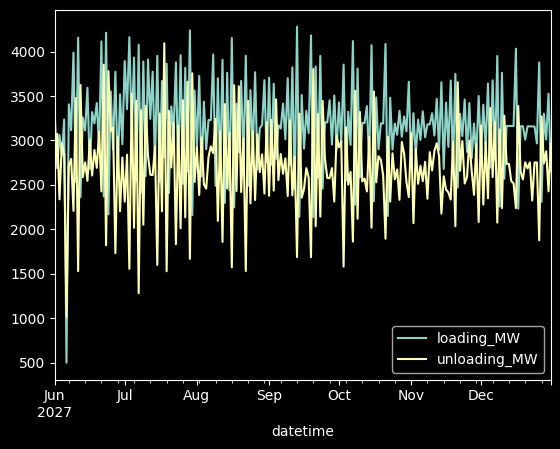

In [237]:
daily_sums.plot(y=["loading_MW", "unloading_MW"])

In [239]:
# Create a new, clean counter from the daily increment
df["YearlyEfc_Calculated"] = df["efc_per_timestep"].cumsum()


<Axes: xlabel='datetime'>

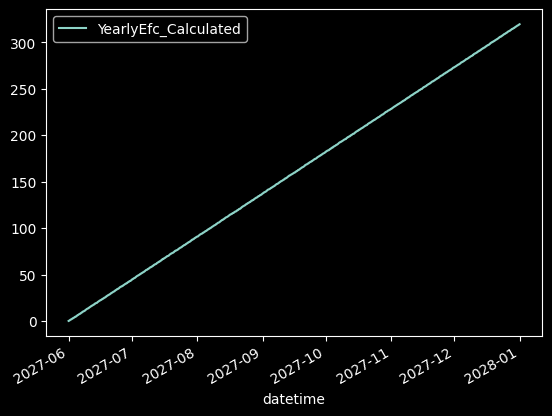

In [241]:
# Plot the result
# df['YearlyEfc_Calculated'].resample('D').mean().plot()
df.YearlyEfc_Calculated.plot(legend=True)



In [246]:
yearly_efc_interpolated = df.YearlyEfc_counter.interpolate()

In [247]:
df["yearly_efc_diff"] = df.YearlyEfc_Calculated - yearly_efc_interpolated


In [254]:
def format_price(x):
    if type(x) == str:
        dots_removed = x.replace(".", "")
        price = float(dots_removed) / 1e7
        return price
    else:
        print(type(x), x)
        return x


In [264]:
df["intraday_price_EUR_per_MWh_formated"] = df.intraday_price_EUR_per_MWh.apply(format_price)

In [268]:
df

,loading_MW,unloading_MW,YearlyEfc_counter,efc_per_timestep,curren state of health,intraday_price_EUR_per_MWh,YearlyEfc_Calculated,yearly_efc_diff,intraday_price_EUR_per_MWh_formated
datetime,,,,,,,,,
2027-06-01 00:00:00,0.0,0.000000,0.000000,0.000000,1,1.110.158.789,0.000000,0.000000,111.015879
2027-06-01 00:15:00,0.0,0.000000,0.000000,0.000000,1,1.187.973.777,0.000000,0.000000,118.797378
2027-06-01 00:30:00,0.0,0.000000,0.000000,0.000000,1,1.140.231.855,0.000000,0.000000,114.023185
2027-06-01 00:45:00,0.0,0.000000,0.000000,0.000000,1,1.255.828.362,0.000000,0.000000,125.582836
2027-06-01 01:00:00,0.0,0.000000,0.000000,0.000000,1,1.191.789.056,0.000000,0.000000,119.178906
...,...,...,...,...,...,...,...,...,...
2027-12-31 22:45:00,0.0,0.000000,319.599668,0.000000,0.966363035,1.122.007.357,319.593839,-0.005829,112.200736
2027-12-31 23:00:00,0.0,0.000000,319.599668,0.000000,0.966363035,9.735.344.589,319.593839,-0.005829,973.534459
2027-12-31 23:15:00,124.5,0.000000,319.629268,0.029599,0.966363035,7.017.537.187,319.623438,-0.005830,701.753719


<Axes: xlabel='datetime'>

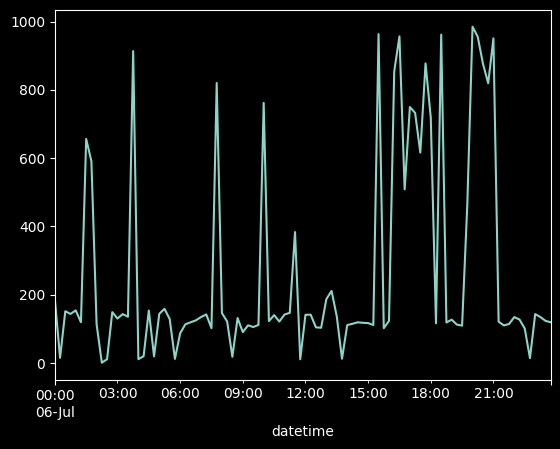

In [278]:
summer_date = "2027-07-06"
day_df = df[df.index.date.astype(str) == summer_date]
day_df.intraday_price_EUR_per_MWh_formated.plot()

<Axes: xlabel='datetime'>

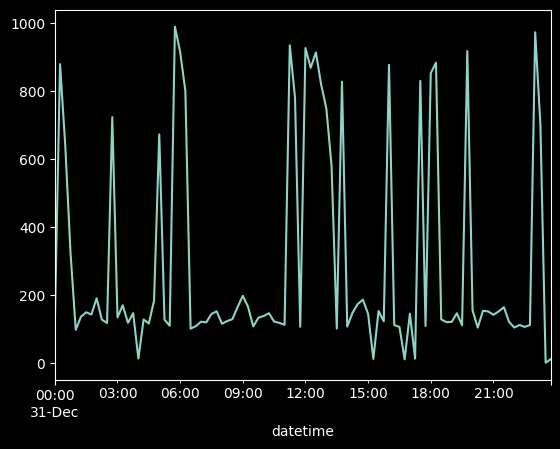

In [282]:
winter_date = "2027-12-31"
day_df = df[df.index.date.astype(str) == winter_date]
day_df.intraday_price_EUR_per_MWh_formated.plot()


In [284]:
# we assume that we by cheap and sell low
revenue_stream = df['loading_MW'] * df['intraday_price_EUR_per_MWh_formated'] * 0.25
cost_stream = df['unloading_MW'] * df['intraday_price_EUR_per_MWh_formated'] * 0.25

total_profit = revenue_stream.sum() - cost_stream.sum()

print(f"Total Net Revenue: €{total_profit:,.2f}")

Total Net Revenue: €30,529,908.18
